In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Ejercicio 1

In [2]:
datos = pd.read_excel('wind_data.xlsx')
print(datos)

       dia  regional wind  wind gap norte sur
0        1       8.000000            0.000000
1        2       8.346296            0.181523
2        3      10.062316            0.188643
3        4      10.791337            0.071085
4        5      10.754093            0.078442
...    ...            ...                 ...
3645  3646       8.642231           -0.869425
3646  3647       6.527408           -1.268447
3647  3648       6.230707           -1.149234
3648  3649       5.550882           -0.420431
3649  3650       6.545450            0.250088

[3650 rows x 3 columns]


In [3]:
datos['wind dif'] = datos['regional wind'] - datos['regional wind'].shift(1)
print(datos)

       dia  regional wind  wind gap norte sur  wind dif
0        1       8.000000            0.000000       NaN
1        2       8.346296            0.181523  0.346296
2        3      10.062316            0.188643  1.716019
3        4      10.791337            0.071085  0.729021
4        5      10.754093            0.078442 -0.037244
...    ...            ...                 ...       ...
3645  3646       8.642231           -0.869425  0.940298
3646  3647       6.527408           -1.268447 -2.114824
3647  3648       6.230707           -1.149234 -0.296701
3648  3649       5.550882           -0.420431 -0.679825
3649  3650       6.545450            0.250088  0.994568

[3650 rows x 4 columns]


In [4]:
datos_filtrados = datos.dropna(subset=['wind dif'])

slope, intercept, r_value, p_value, std_err = stats.linregress(datos_filtrados['dia'], datos_filtrados['wind dif'])

beta_1 = slope
beta_0 = intercept

print('beta_0:', beta_0)
print('beta_1:', beta_1)

beta_0: -0.002552164882229644
beta_1: 1.1793804766925413e-06


In [5]:
kappa = -365 * beta_1
print('kappa:', kappa)

kappa: -0.0004304738739927776


In [6]:
Y_pred = beta_0 + beta_1 * datos_filtrados['dia']

residuo = datos_filtrados['wind dif'] - Y_pred

sigma = np.std(residuo)
sigma

0.9109624264797358

In [7]:
datos['gap dif'] = datos['wind gap norte sur'] - datos['wind gap norte sur'].shift(1)
print(datos)

       dia  regional wind  wind gap norte sur  wind dif   gap dif
0        1       8.000000            0.000000       NaN       NaN
1        2       8.346296            0.181523  0.346296  0.181523
2        3      10.062316            0.188643  1.716019  0.007120
3        4      10.791337            0.071085  0.729021 -0.117558
4        5      10.754093            0.078442 -0.037244  0.007358
...    ...            ...                 ...       ...       ...
3645  3646       8.642231           -0.869425  0.940298  0.185931
3646  3647       6.527408           -1.268447 -2.114824 -0.399021
3647  3648       6.230707           -1.149234 -0.296701  0.119213
3648  3649       5.550882           -0.420431 -0.679825  0.728803
3649  3650       6.545450            0.250088  0.994568  0.670518

[3650 rows x 5 columns]


In [8]:
datos_filtrados_gap = datos.dropna(subset=['gap dif'])

slope_gap, intercept_gap, r_value_gap, p_value_gap, std_err_gap = stats.linregress(datos_filtrados_gap['dia'], datos_filtrados_gap['gap dif'])

beta_1_gap = slope_gap
beta_0_gap = intercept_gap

print('beta_0:', beta_0_gap)
print('beta_1:', beta_1_gap)

beta_0: -8.662160282027568e-05
beta_1: 8.497127690939294e-08


In [9]:
beta = -365 * beta_1_gap
beta

-3.101451607192842e-05

In [10]:
D_pred = beta_0_gap + beta_1_gap * datos_filtrados['dia']

residuo_gap = datos_filtrados_gap['gap dif'] - D_pred

gamma = np.std(residuo_gap)
gamma

0.5465935050937145

## Ejercicio 2

In [11]:
def theta(t):
    return 6 + 2 * np.cos(2 * np.pi * t / 365)

In [50]:
caminos_S = []
caminos_D = []

for m in range(1000):
    S = np.zeros(365)
    D = np.zeros(365)

    # Valores iniciales (suponemos que S_0 y D_0 son conocidos o se dan como 0)
    S[0] = np.mean(datos['regional wind'])
    D[0] = 0

    for i in range(1, 365):
        S[i] = S[i - 1] + kappa * (theta(i) - S[i - 1]) * 1/365 + sigma * np.sqrt(1/365) * np.random.normal(0, 1)
        
        D[i] = D[i-1] - beta * D[i-1] * 1/365 + gamma * np.sqrt(1/365) * np.random.normal(0, 1)

    caminos_S.append(S)
    caminos_D.append(D)

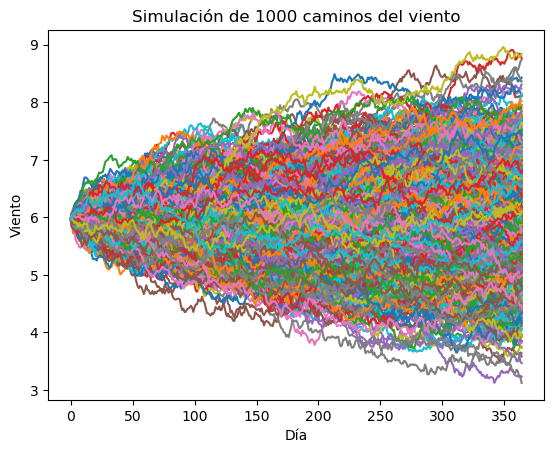

In [51]:
for i in range(1000):
    plt.plot(caminos_S[i])

plt.title('Simulación de 1000 caminos del viento')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()

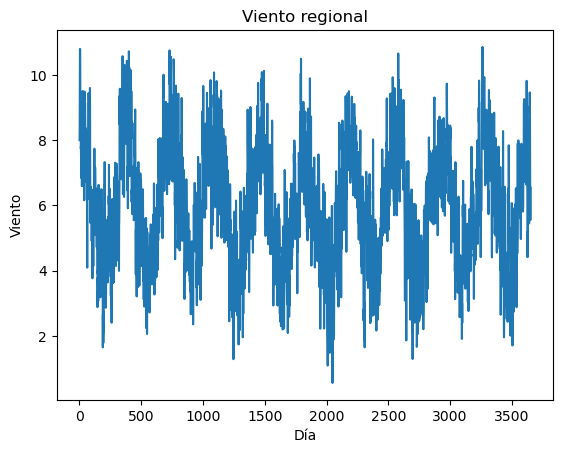

In [34]:
plt.plot(datos['dia'], datos['regional wind'])
plt.title('Viento regional')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()

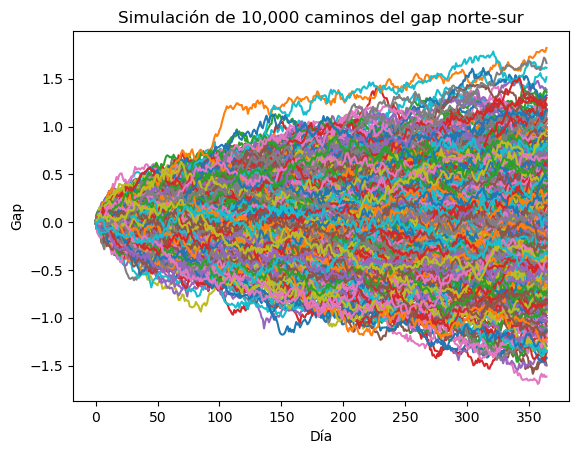

In [53]:
for i in range(1000):
    plt.plot(caminos_D[i])
plt.title('Simulación de 10,000 caminos del gap norte-sur')
plt.xlabel('Día')
plt.ylabel('Gap')
plt.show()

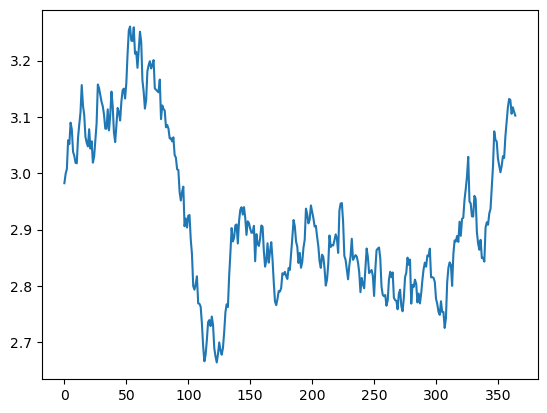

In [54]:
#Viento en molino norte
S_norte = (S+D)/2

plt.plot(S_norte)
plt.show()

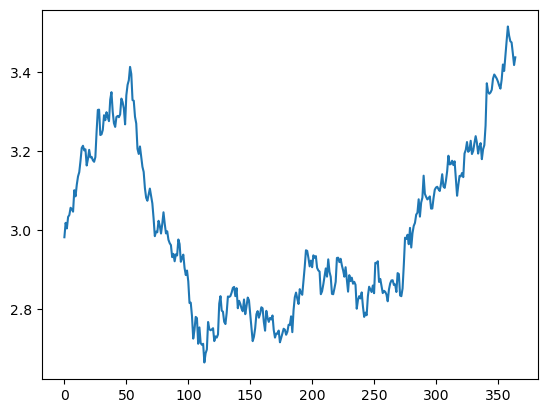

In [55]:
S_sur = (S-D)/2

plt.plot(S_sur)
plt.show()

Media del viento simulado: 5.925068936383809
Desviación estándar del viento simulado: 0.3182726137834719
Media del viento histórico: 5.964442822277723
Desviación estándar del viento histórico: 1.8032133987250791
Media de la diferencia simulada: -0.07943323419967199
Desviación estándar de la diferencia simulada: 0.15280175586516753
Media de la diferencia histórica: -0.0003986161317890626
Desviación estándar de la diferencia histórica: 0.9109632735972384


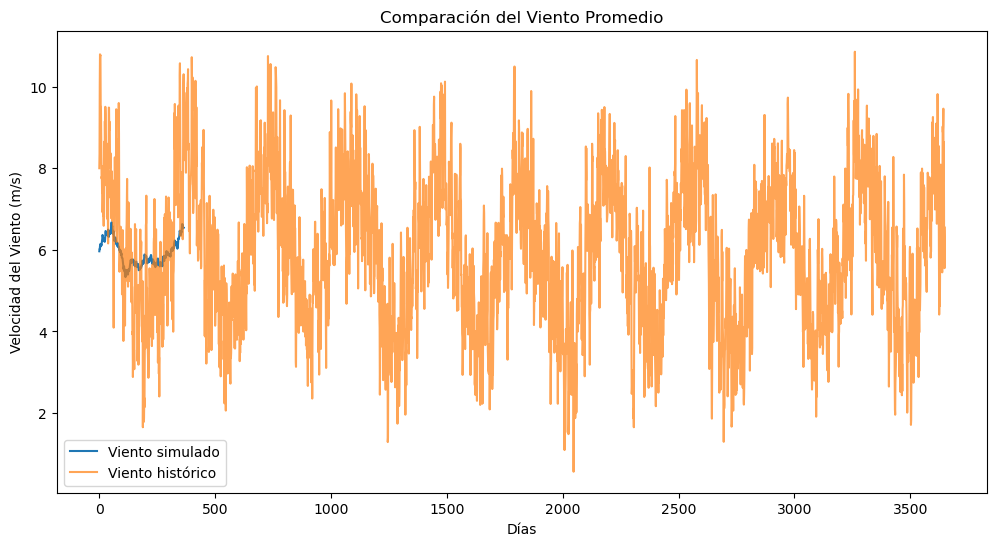

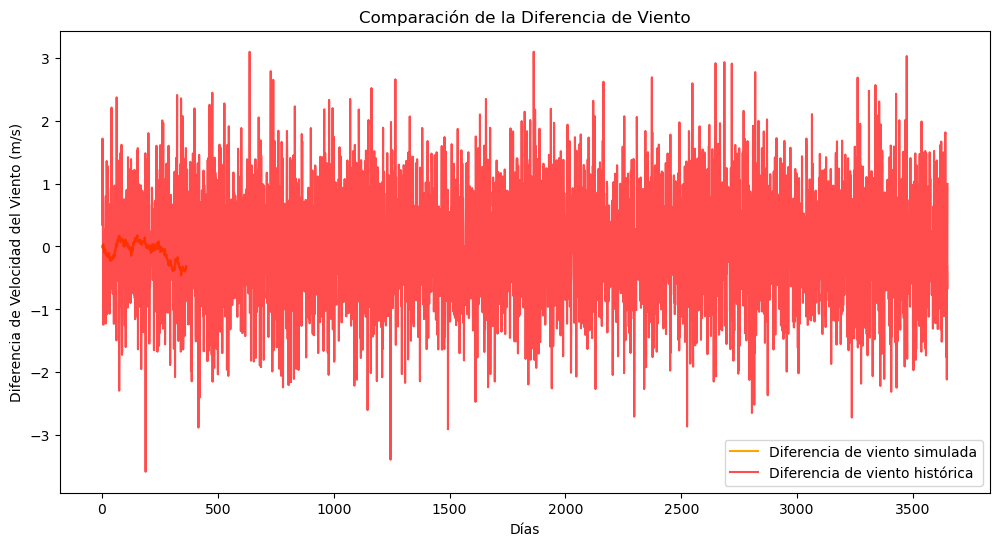

In [56]:
# Supongamos que tienes datos históricos de 'wind' y 'wind dif'
historical_wind = datos['regional wind']  # Reemplaza con la columna correcta
historical_wind_dif = datos['wind dif']

# Comparación de la media y desviación estándar
print(f"Media del viento simulado: {np.mean(S)}")
print(f"Desviación estándar del viento simulado: {np.std(S)}")
print(f"Media del viento histórico: {np.mean(historical_wind)}")
print(f"Desviación estándar del viento histórico: {np.std(historical_wind)}")

# Similar para la diferencia de viento
print(f"Media de la diferencia simulada: {np.mean(D)}")
print(f"Desviación estándar de la diferencia simulada: {np.std(D)}")
print(f"Media de la diferencia histórica: {np.mean(historical_wind_dif)}")
print(f"Desviación estándar de la diferencia histórica: {np.std(historical_wind_dif)}")

# Gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(S, label='Viento simulado')
plt.plot(historical_wind, label='Viento histórico', alpha=0.7)
plt.title('Comparación del Viento Promedio')
plt.xlabel('Días')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(D, label='Diferencia de viento simulada', color='orange')
plt.plot(historical_wind_dif, label='Diferencia de viento histórica', color='red', alpha=0.7)
plt.title('Comparación de la Diferencia de Viento')
plt.xlabel('Días')
plt.ylabel('Diferencia de Velocidad del Viento (m/s)')
plt.legend()
plt.show()
